In [3]:
# import eyes17.eyes
import matplotlib.pyplot as plt
import numpy as np
import json

# p = eyes17.eyes.open()

In [2]:
p.set_pv1(5)

5.0

In [3]:
def read_input(time = 2, dt = 4000):
    x, y = p.capture1('A1',int(time*1000000/dt),int(dt))
    return np.array(x), np.array(y)

In [6]:
t, val = read_input(30)

In [7]:
# write the data (val and T) to a json file
with open("pend.json", "w") as f:
    json.dump({"val": val.tolist(), "t": t.tolist()}, f)

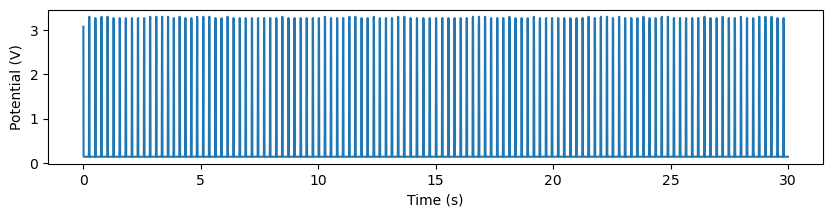

In [10]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.plot(t/1000, val)
plt.xlabel('Time (s)')
plt.ylabel('Potential (V)')
plt.savefig('pend.png')
plt.show()

In [11]:
def times_between_peaks(t, val):
    val = val > 3
    
    # asuming val[0] == False
    
    # detecting the first peak time
    i = 0
    got_first = False
    ts = []
    while i < len(val)-1:
        if not got_first:
            if val[i] == True and val[i+1] == False:
                t0 = t[i]
                got_first = True
        else:
            if val[i] == True and val[i+1] == False:
                ts.append(t[i] - t0)
                t0 = t[i]
        
        i += 1
    
    if len(ts)%2: ts.pop()
    return np.array(ts)
    

In [12]:
times = times_between_peaks(t, val)
T = times.mean()/500

In [25]:
def g(T, l=10e-2):
    return 2*l/3 * (2*np.pi/T)**2

In [36]:
g0 = g(0.5185)
g_accn = g(0.492)
g_decn = g(0.544)
print(f"g in Lab frame: \t\t{g0:.3f} m/s^2")
print(f"g in Accelerating frame: \t{g_accn:.3f} m/s^2")
print(f"difference: \t\t\t{(g_accn - g0):.3f} m/s^2")
print(f"g in Decelerating frame: \t{g_decn:.3f} m/s^2")
print(f"difference: \t\t\t{(g_decn - g0):.3f} m/s^2")

g in Lab frame: 		9.790 m/s^2
g in Accelerating frame: 	10.873 m/s^2
difference: 			1.083 m/s^2
g in Decelerating frame: 	8.893 m/s^2
difference: 			-0.896 m/s^2
